### 

### Do not run this notebook!

- This notebook was used to generate the three road networks that will be
used as input for tests

- The notebook is temporarily here for documentation purposes only

- The three road networks should remain unchanged so the tests remain
reproducible. Please make subraphs or copies for the tests you need, but 
don't modify the "master" networks. 



In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import random

print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

/Users/catherine/Library/Caches/pypoetry/virtualenvs/gpbp-ys_3FNdB-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:154: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()


OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

### Specify place: city of Alameda in the U.S.

Chosen as it was an example in the osmnx documentation

In [2]:
alameda = {
    "city": "Alameda",
    "county": "Alameda County",
    "state": "California",
    "country": "USA",
}

## Walk network

### Download actual walking road network for Alameda on December 2024

In [3]:
G_full_walk_network = ox.graph_from_place(alameda, network_type="walk")

type(G_full_walk_network)

networkx.classes.multidigraph.MultiDiGraph

In [4]:
f"""As of December 2024, Alameda city's walking road network has {G_full_walk_network.number_of_nodes()} nodes and {G_full_walk_network.number_of_edges()} edges"""

"As of December 2024, Alameda city's walking road network has 7373 nodes and 21176 edges"

That's still too large for our purposes. Let's choose a subgraph

In [5]:
# Fix a seed to get reproducible results
random.seed(42)

# choose a random node
ego_node = random.choice(list(G_full_walk_network.nodes))

ego_node == 5909483625

True

### Getting a subgraph

In [6]:
# Get the subgraph of G that contains the ego_node and up to 3 nodes away from it. Includes edges

walk_network = nx.ego_graph(G_full_walk_network, ego_node, radius=3)

f"""This subgraph has {walk_network.number_of_nodes()} nodes and {walk_network.number_of_edges()} edges"""

'This subgraph has 9 nodes and 18 edges'

In [7]:
walk_network.nodes[ego_node]

{'y': 37.7687576, 'x': -122.231243, 'street_count': 1}

### Visualization

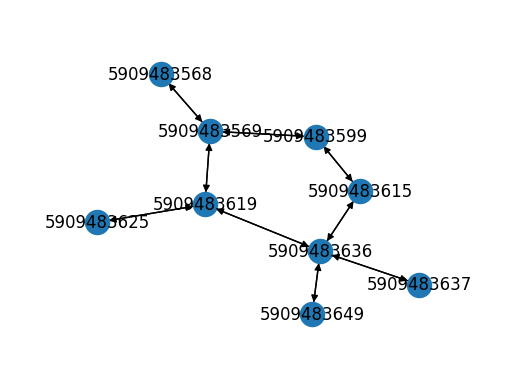

In [8]:
nx.draw_networkx(walk_network)

# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


### Save network as a graphml file

In [10]:
# This notebook is in the test_data folder because it makes logical
# sense as it is used to create test_data. Plus, it simplifies the filepath

filepath = "walk_network_MAIN.graphml"

ox.save_graphml(walk_network, filepath)